In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Exploratory Data Analysis / Data Prep

I want to get more familiar with the data in order to build a model to predict the target values. I will start by looking at each column to see if there is a correlation from each column to the target value. 

To identify the stronger columns first I will create a correlation matrix. The correlation matrix can also help identify reltions between other columns in order to fill some NAs 

In [44]:
data = pd.read_csv('train.csv')

#I will have to number columns like HomePlanet in order to use
#Ex earth = 0, Mars = 1, and Europa = 2
data['HomePlanet'] = data['HomePlanet'].map({'Earth':0, 'Europa':1, 'Mars':3})

In [63]:
data['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

I also want to split up the Cabin column into three columns, for Deck, Num, and side. 

In [64]:
data[['Deck', 'Num', 'Side']] = data['Cabin'].str.split('/', expand=True)
deck_map = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'T':7}
side_map = {'S':0, 'P':1}
destination_map = {'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2}
data['Deck'] = data['Deck'].map(deck_map)
data['Num'] = data['Num'].astype('float64')
data['Side'] = data['Side'].map(side_map)
data['Destination'] = data['Destination'].map(destination_map)
data['CryoSleep'] = data['CryoSleep'].astype('bool')
data['VIP'] = data['VIP'].astype('bool')

### Corr Matrix

<AxesSubplot:>

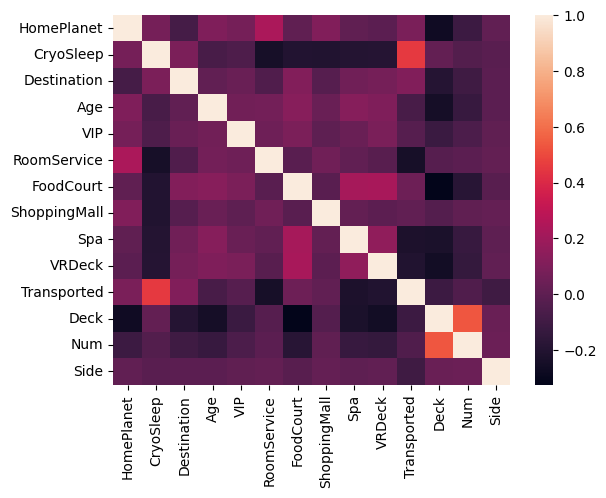

In [65]:
corr_matrix = data.corr()

#To viz the corr matrix better a heat map will be created. 
sns.heatmap(corr_matrix)